In [7]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary

In [8]:
!git clone https://github.com/wikibook/pythonlibs.git

from pythonlibs.torch_lib1 import *

print(README)

fatal: destination path 'pythonlibs' already exists and is not an empty directory.


Common Library for PyTorch
Author: M. Akaishi


In [9]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [10]:
data_dir = "pythonlibs\images\dog_wolf"

import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

classes = ['dog', 'wolf']

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

In [13]:
batch_size = 5

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)

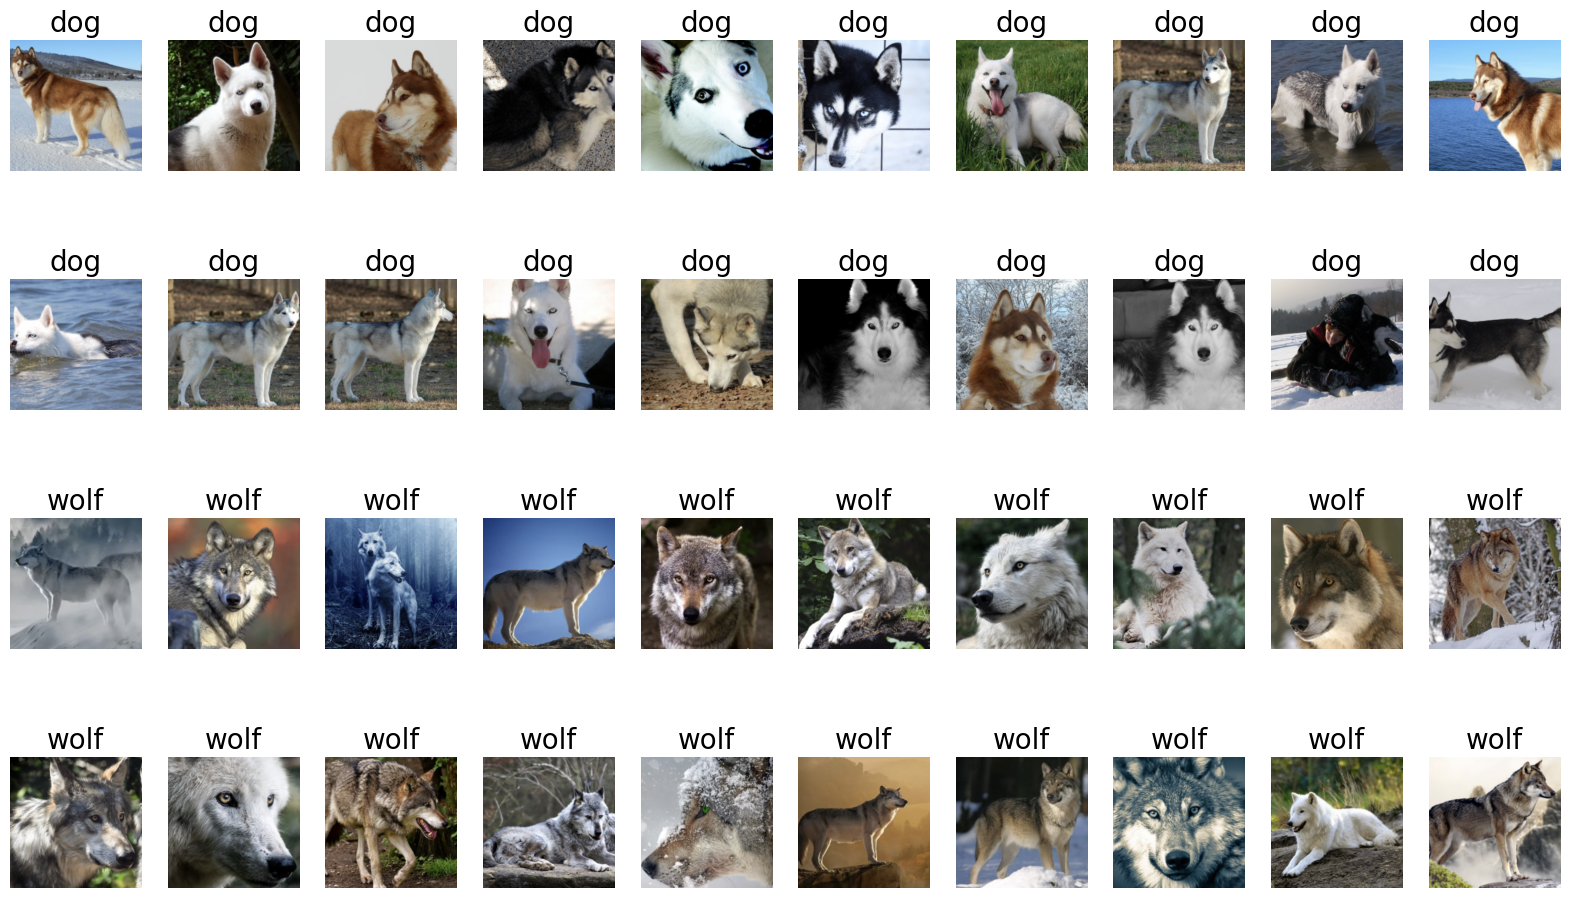

In [20]:
show_images_labels(train_loader2, classes, None, None)

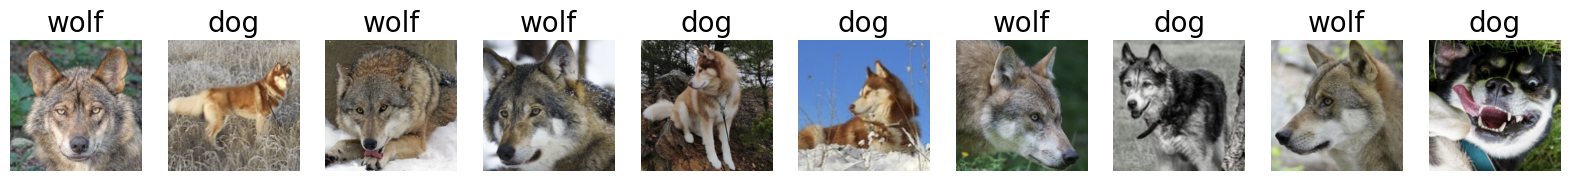

In [21]:
torch_seed()
show_images_labels(test_loader2, classes, None, None)

In [22]:
from torchvision import models

net = models.vgg19_bn(pretrained=True)

for params in net.parameters():
    params.requires_grad = False

torch_seed()

in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

net.avgpool = nn.Identity()

device = "cuda:0"
net = net.to(device)

lr=0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.classifier[6].parameters(), lr=lr, momentum=0.9)
history = np.zeros((0, 5))

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
num_epochs = 100
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.01653 acc: 1.00000 val_loss: 0.02890, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.01022 acc: 1.00000 val_loss: 0.03190, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.01561 acc: 1.00000 val_loss: 0.03942, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.01238 acc: 0.97500 val_loss: 0.03397, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.01225 acc: 1.00000 val_loss: 0.02669, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.01019 acc: 0.97500 val_loss: 0.01996, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.02727 acc: 0.95000 val_loss: 0.03543, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.01235 acc: 1.00000 val_loss: 0.04194, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.01195 acc: 0.97500 val_loss: 0.02903, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00719 acc: 1.00000 val_loss: 0.02945, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.02339 acc: 0.97500 val_loss: 0.02399, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00724 acc: 1.00000 val_loss: 0.02638, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.02787 acc: 0.97500 val_loss: 0.05537, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.01042 acc: 1.00000 val_loss: 0.03675, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00557 acc: 1.00000 val_loss: 0.04468, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.01085 acc: 1.00000 val_loss: 0.05302, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.02350 acc: 0.95000 val_loss: 0.03081, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00948 acc: 0.97500 val_loss: 0.02740, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00890 acc: 0.97500 val_loss: 0.02935, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00852 acc: 1.00000 val_loss: 0.01996, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.01527 acc: 0.95000 val_loss: 0.01985, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.01029 acc: 0.97500 val_loss: 0.02076, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00323 acc: 1.00000 val_loss: 0.02759, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.01003 acc: 0.97500 val_loss: 0.02108, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.01568 acc: 0.95000 val_loss: 0.01942, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.02638 acc: 0.95000 val_loss: 0.04555, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.01977 acc: 0.97500 val_loss: 0.02279, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00838 acc: 0.97500 val_loss: 0.01620, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.05154 acc: 0.92500 val_loss: 0.03041, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00947 acc: 0.97500 val_loss: 0.04246, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00385 acc: 1.00000 val_loss: 0.03427, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00956 acc: 0.97500 val_loss: 0.03349, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.01237 acc: 0.97500 val_loss: 0.02994, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00637 acc: 1.00000 val_loss: 0.04180, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00850 acc: 0.97500 val_loss: 0.02831, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.01765 acc: 0.95000 val_loss: 0.02761, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00360 acc: 1.00000 val_loss: 0.02511, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.01444 acc: 0.97500 val_loss: 0.03022, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.01438 acc: 0.97500 val_loss: 0.03050, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00671 acc: 1.00000 val_loss: 0.04363, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.02078 acc: 0.97500 val_loss: 0.03350, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00846 acc: 1.00000 val_loss: 0.02346, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.02039 acc: 0.97500 val_loss: 0.02363, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00099 acc: 1.00000 val_loss: 0.01656, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00595 acc: 1.00000 val_loss: 0.01279, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.01725 acc: 0.97500 val_loss: 0.02453, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.01241 acc: 0.97500 val_loss: 0.03212, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.01829 acc: 0.97500 val_loss: 0.02774, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00769 acc: 1.00000 val_loss: 0.02354, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00379 acc: 1.00000 val_loss: 0.02292, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00454 acc: 1.00000 val_loss: 0.01910, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00271 acc: 1.00000 val_loss: 0.01888, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00516 acc: 1.00000 val_loss: 0.01813, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00771 acc: 1.00000 val_loss: 0.01936, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00794 acc: 1.00000 val_loss: 0.01599, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00432 acc: 1.00000 val_loss: 0.02113, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.01152 acc: 0.97500 val_loss: 0.01698, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00342 acc: 1.00000 val_loss: 0.01952, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.01519 acc: 0.97500 val_loss: 0.03925, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00703 acc: 0.97500 val_loss: 0.05261, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00161 acc: 1.00000 val_loss: 0.03209, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00240 acc: 1.00000 val_loss: 0.02985, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00309 acc: 1.00000 val_loss: 0.01912, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00302 acc: 1.00000 val_loss: 0.01801, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.01096 acc: 1.00000 val_loss: 0.02143, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.02650 acc: 0.97500 val_loss: 0.01515, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00356 acc: 1.00000 val_loss: 0.01909, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.01682 acc: 0.97500 val_loss: 0.02062, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00205 acc: 1.00000 val_loss: 0.02674, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00682 acc: 1.00000 val_loss: 0.03667, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00392 acc: 1.00000 val_loss: 0.03909, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.01207 acc: 0.97500 val_loss: 0.04696, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00589 acc: 0.97500 val_loss: 0.04212, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00191 acc: 1.00000 val_loss: 0.03755, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.01150 acc: 0.97500 val_loss: 0.05804, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00443 acc: 1.00000 val_loss: 0.06004, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00781 acc: 0.97500 val_loss: 0.05724, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.02842 acc: 0.92500 val_loss: 0.06465, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.01284 acc: 0.97500 val_loss: 0.04598, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.02021 acc: 0.95000 val_loss: 0.03549, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00374 acc: 1.00000 val_loss: 0.02653, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00469 acc: 1.00000 val_loss: 0.02137, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00319 acc: 1.00000 val_loss: 0.02379, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.02426 acc: 0.97500 val_loss: 0.03367, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00507 acc: 1.00000 val_loss: 0.05016, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00368 acc: 1.00000 val_loss: 0.06029, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00374 acc: 1.00000 val_loss: 0.06079, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00598 acc: 1.00000 val_loss: 0.05992, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.01468 acc: 0.97500 val_loss: 0.04702, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00595 acc: 1.00000 val_loss: 0.04921, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00075 acc: 1.00000 val_loss: 0.05155, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.03183 acc: 0.95000 val_loss: 0.04976, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00408 acc: 1.00000 val_loss: 0.02348, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.02580 acc: 0.95000 val_loss: 0.03092, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00561 acc: 0.97500 val_loss: 0.04209, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00632 acc: 1.00000 val_loss: 0.05590, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00510 acc: 1.00000 val_loss: 0.05681, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.01098 acc: 0.95000 val_loss: 0.03701, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00225 acc: 1.00000 val_loss: 0.02274, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.01368 acc: 0.97500 val_loss: 0.01764, val_acc: 1.00000


초기상태 : 손실 : 0.02890  정확도 : 1.00000
최종상태 : 손실 : 0.01764 정확도 : 1.00000


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.

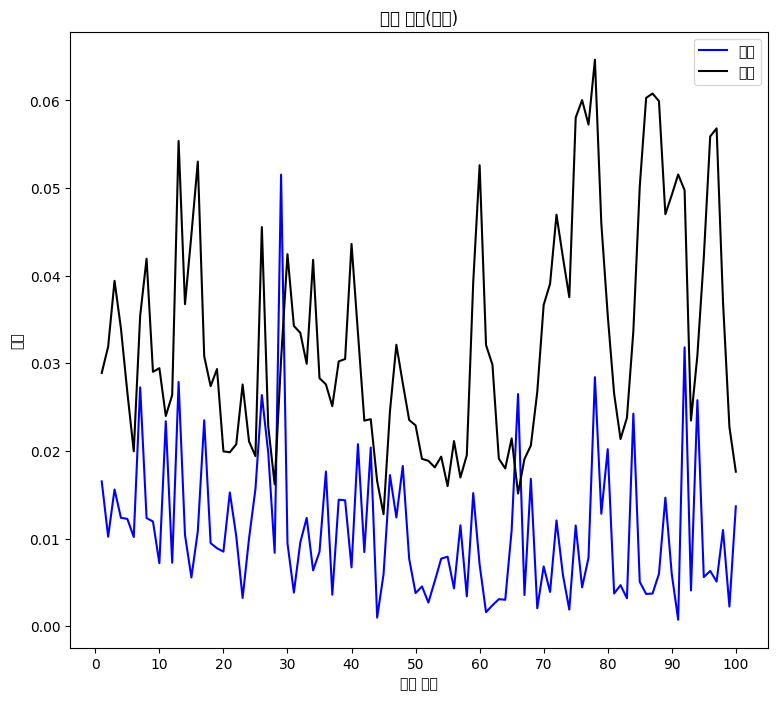

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


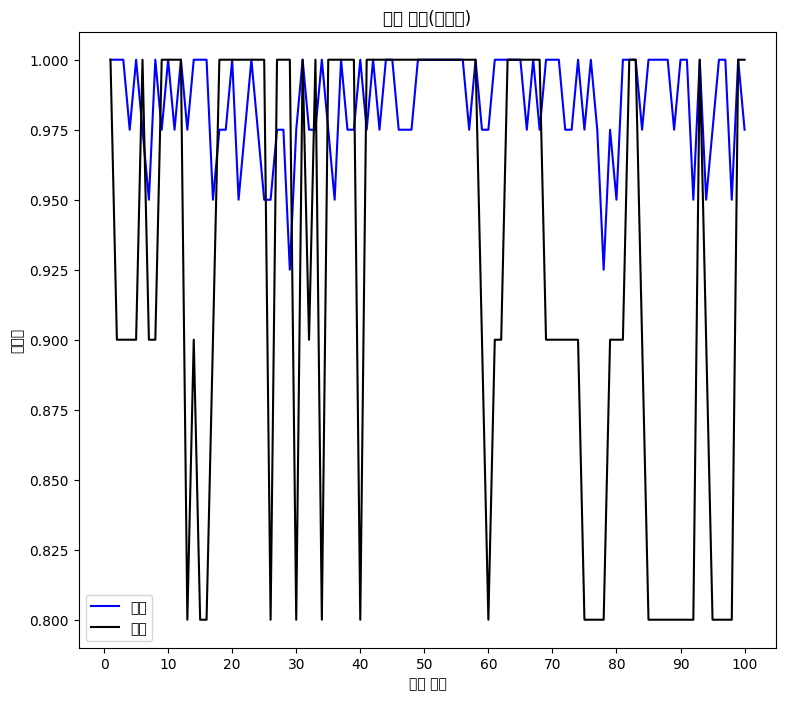

In [26]:
evaluate_history(history)

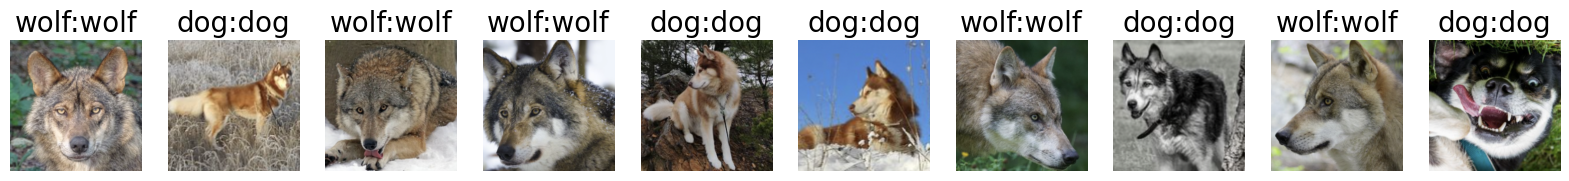

In [28]:
torch_seed()
show_images_labels(test_loader2, classes, net, "cuda:0")